In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

In [2]:
from PIL import Image

In [3]:
ASSETS_FOLDER_PATH = "../assets"
OUTPUT_FOLDER_PATH = "."

In [4]:
Path(OUTPUT_FOLDER_PATH).mkdir(parents=True, exist_ok=True)

In [5]:
b = Image.open(f"{ASSETS_FOLDER_PATH}/barbara.gif")

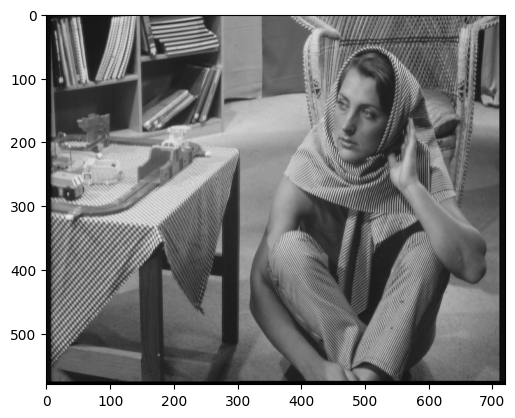

In [6]:
plt.imshow(b, cmap="gray", vmin=0, vmax=255) 

In [7]:
b = np.array(b)

In [8]:
h = np.array([
    [0, 1/6, 0],
    [1/6, 1/3, 1/6],
    [0, 1/6, 0]
])

In [9]:
h = h / np.sum(h[:])

In [10]:
h_unsharp = np.array([[-1/6, 2/3, -1/6], 
                    [-2/3, 13/3, -2/3], 
                    [-1/6, -2/3, -1/6]]) 

In [11]:
h_unsharp = np.array([
   [-1/6, 2/3, -1/6], 
   [-2/3, 13/3, -2/3], 
   [-1/6, -2/3, -1/6]]
) 

h_disk = np.array([
   [       0,         0,        0, 67/53617,    3/604, 63/10064,    3/604, 67/53617,        0,        0,        0],
   [       0,  4/124819, 94/15267,  61/4921, 113/8875, 113/8875, 113/8875,  61/4921, 94/15267, 4/124819,        0],
   [       0,  94/15267, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875, 94/15267,        0],
   [ 67/53617,  61/4921, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875,  61/4921, 67/53617],
   [    3/604, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875,    3/604],
   [ 63/10064, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875, 63/10064],
   [    3/604, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875,    3/604],
   [ 67/53617,  61/4921, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875,  61/4921, 67/53617],
   [        0, 94/15267, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875, 113/8875, 94/15267,        0],
   [        0, 4/124819, 94/15267,  61/4921, 113/8875, 113/8875, 113/8875,  61/4921, 94/15267, 4/124819,        0],
   [        0,        0,        0, 67/53617,    3/604, 63/10064,    3/604, 67/53617,        0,        0,        0]
])

In [12]:
h1 = cv2.filter2D(src=b, ddepth=-1, kernel=h_unsharp) 
h2 = cv2.filter2D(src=b, ddepth=-1, kernel=h_disk) 

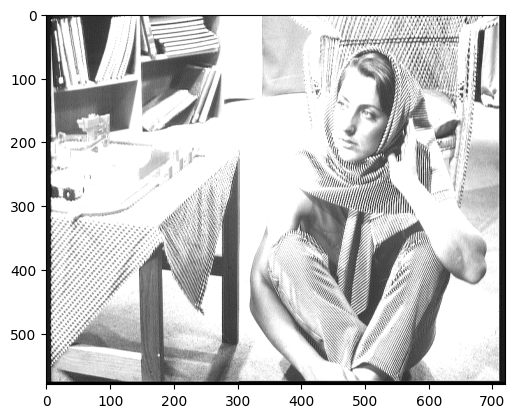

In [13]:
plt.imshow(h1, cmap="gray", vmin=0, vmax=255) 

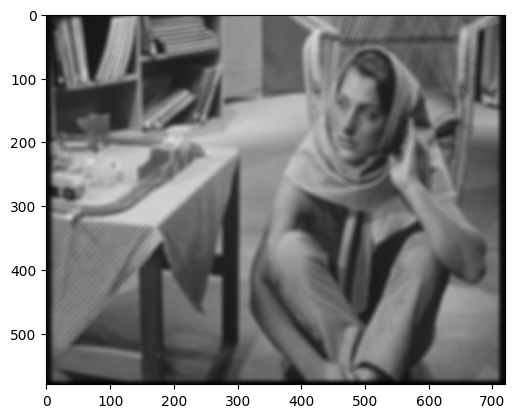

In [14]:
plt.imshow(h2, cmap="gray", vmin=0, vmax=255) 

In [15]:
h1_image = Image.fromarray(h1)
h1_image.save(f"{OUTPUT_FOLDER_PATH}/unsharp.gif")

In [16]:
h2_image = Image.fromarray(h2, mode="L")
h2_image.save(f"{OUTPUT_FOLDER_PATH}/disk.gif")